In [1]:
import os
import sys
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

script_dir = "./"
sys.path.append(os.path.abspath(script_dir))


# Problem 1

In [2]:
A = np.loadtxt(fname="hw2/processed.txt", delimiter = ",")
country = np.loadtxt(fname="hw2/row.txt", dtype = "str",delimiter = "\n")
# var = np.loadtxt(fname="hw2/column.txt", dtype = "str",delimiter = "\n")

the column variables are too long for annotating; I make them shorter below

In [3]:
var = np.array(["InfantDeath", "Inhab/physi","Pop/sq.km", "Pop/agri", "Literate", "Student", "GNP"])

## (b)

PCA function computes the projected coordinates for us. 

In [4]:
pca = PCA(n_components=2)
pca.fit(A)
coord = pca.transform(A)

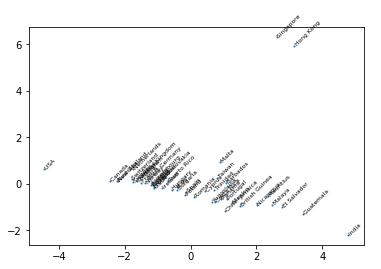

In [5]:
x1 = coord[:, 0]
x2 = coord[:, 1]

fig, ax = plt.subplots()
ax.scatter(x1, x2, s = 1)

for i, txt in enumerate(country):
    ax.annotate(txt, (x1[i], x2[i]), fontsize=6, rotation=45)

The outliers are Singapore and Hong Kong, as other countries fall nearly on a line. 

## (c) 
Simply apply PCA function to $A^T$ can get waht we want

In [6]:
pca = PCA(n_components=2)
pca.fit(A.T)
coord2 = pca.transform(A.T)

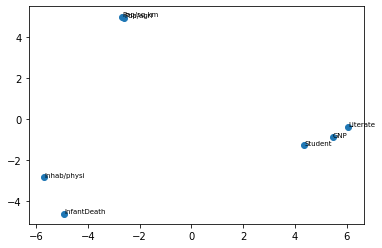

In [7]:
y1 = coord2[:, 0]
y2 = coord2[:, 1]

fig, ax = plt.subplots()
ax.scatter(y1, y2)

for i, txt in enumerate(var):
    ax.annotate(txt, (y1[i], y2[i]), fontsize=7)

## (d)

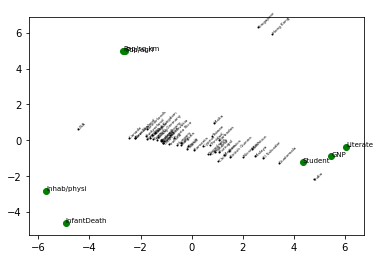

In [8]:
fig, ax = plt.subplots()
ax.scatter(x1, x2, s = 1, color="k")

for i, txt in enumerate(country):
    ax.annotate(txt, (x1[i], x2[i]), fontsize=4, rotation=45)
    
ax.scatter(y1, y2,color="g")
for i, txt in enumerate(var):
    ax.annotate(txt, (y1[i], y2[i]), fontsize=7)

* The closest variables are population desnity and population/agriculture ratio.
* Not surprising as Hong Kong and Singapore both have a huge population density, and huge population/agriculture ratio

## (e)

In [9]:
country = np.delete(country, (16, 38), axis=0)
A = np.delete(A, (16, 38), axis=0)

<Figure size 24000x18000 with 0 Axes>

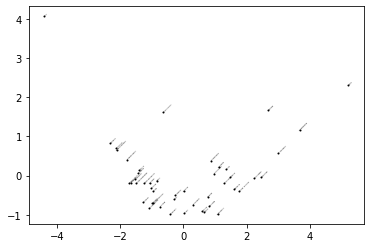

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(24, 18), dpi=1000)

pca = PCA(n_components=2)
pca.fit(A)
coord = pca.transform(A)
pca = PCA(n_components=2)
pca.fit(A.T)
coord2 = pca.transform(A.T)

x1 = coord[:, 0]
x2 = coord[:, 1]
y1 = coord2[:, 0]
y2 = coord2[:, 1]

fig, ax = plt.subplots()
ax.scatter(x1, x2, s = 1, color="k")

for i, txt in enumerate(country):
    ax.annotate(txt, (x1[i], x2[i]), fontsize=2, rotation=45)
    
# ax.scatter(y1, y2,s = 1, color="g")
# for i, txt in enumerate(var):
#     ax.annotate(txt, (y1[i], y2[i]), fontsize=7)
    
plt.savefig("country.png", format="png", dpi=800)
plt.show()

Finland and Austria are more similar to Japan. (this image here is a bit too small but enlarge it you will see)

# Problem 5

### (a), (b), (c)

In [11]:
def norm_m(A, norm):
    if norm == "one":
        return np.abs(A).sum(axis = 0).max()
    if norm == "infty":
        return np.abs(A).sum(axis = 1).max()
    
def norm_v(a, norm):
    if norm == "two":
        return np.sqrt((a**2).sum())
    if norm == "one":
        return np.abs(a).sum()
    if norm == "infty":
        return np.abs(a).max()
    
def my_magic(N):
    magic_square = np.zeros((N,N), dtype=int)

    n = 1
    i, j = 0, N//2

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj
    
    return magic_square

In [12]:
def experiment1(which_matrix ,n):
    if which_matrix == "gaussian":
        np.random.seed(123)
        A = np.random.normal(size = (n, n))
    if which_matrix == "hilbert":
        A = scipy.linalg.hilbert(n)
    if which_matrix == "pascal":
        A = scipy.linalg.pascal(n).astype('float')
    if which_matrix == "magic":
        A = my_magic(n)
        
    A_inv = np.linalg.inv(A)
    x = np.ones((n))
    b = A @ x

    xhat = np.linalg.solve(A, b)
    db = A @ xhat - b
    dx = x - xhat

    _, s, _ = np.linalg.svd(A)

    K2 = s[0]/s[-1]
    K1 = norm_m(A, "one") * norm_m(A_inv, "one")
    Kinf = norm_m(A, "infty") * norm_m(A_inv, "infty")


    err_b_1 = K1 * norm_v(db, "one") / norm_v(b, "one")
    err_b_2 = K2 * norm_v(db, "two") / norm_v(b, "two")
    err_b_inf = Kinf * norm_v(db, "infty") / norm_v(b, "infty")

    err_x_1 = norm_v(dx, "one") / norm_v(x, "one")
    err_x_2 = norm_v(dx, "two") / norm_v(x, "two")
    err_x_inf = norm_v(dx, "infty") / norm_v(x, "infty")

    return {'which_matrix':which_matrix, 'n':int(n),
            'K1':K1, 'K2':K2, 'Kinf':Kinf, 
            'err_b_1' : err_b_1, 'err_b_2' : err_b_2, 'err_b_inf' : err_b_inf, 
            'err_x_1' : err_x_1, 'err_x_2' : err_x_2, 'err_x_inf' : err_x_inf}

### gaussian matrix

In [13]:
ns = [5, 10, 15, 50, 100, 200, 400, 500]

{'which_matrix': 'gaussian', 'n': 5, 'K1': 99.06610575253772, 'K2': 56.751842780848925, 'Kinf': 144.94925327372624, 'err_b_1': 4.571741107110044e-15, 'err_b_2': 4.294808346830381e-15, 'err_b_inf': 1.2034988007212123e-14, 'err_x_1': 3.3306690738754696e-16, 'err_x_2': 3.7485443673843946e-16, 'err_x_inf': 6.661338147750939e-16}


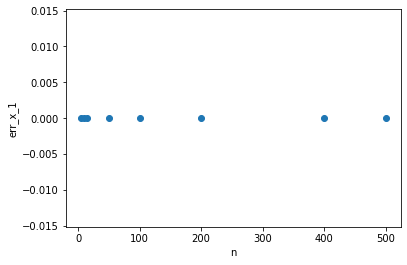

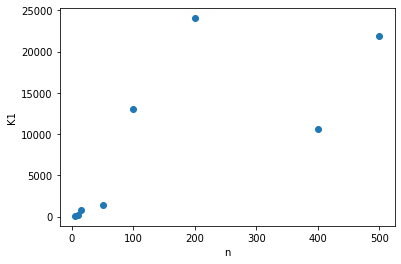

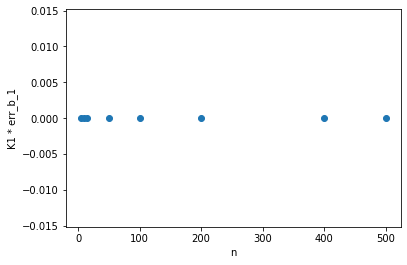

In [14]:
which_matrix = "gaussian"

print(experiment1(which_matrix, 5))
res = pd.DataFrame()
for n in ns:
    res = res.append(experiment1(which_matrix, n), ignore_index=True)

plt.scatter(res['n'], res['err_x_1'])
plt.ylabel('err_x_1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1'])
plt.ylabel('K1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1']*res['err_b_1'])
plt.ylabel('K1 * err_b_1')
plt.xlabel('n')
plt.show()

#### Comment

* when A is gaussian matrix the error is small and stable with increasing $n$
* Although condition number can be large (well, not so large compared to other cases), the $K(A) \frac{||\delta b||}{||b||}$ is still small
* I only show a couple of results but other combinations are similar

### Hilbert Matrix

{'which_matrix': 'hilbert', 'n': 5, 'K1': 943655.9999992527, 'K2': 476607.25024100055, 'Kinf': 943655.9999992514, 'err_b_1': 3.245390188915323e-11, 'err_b_2': 3.372167780311218e-11, 'err_b_inf': 9.176659432334415e-11, 'err_x_1': 1.4343548571105202e-11, 'err_x_2': 1.807766101265572e-11, 'err_x_inf': 3.096567446903009e-11}


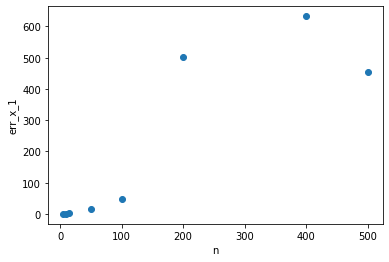

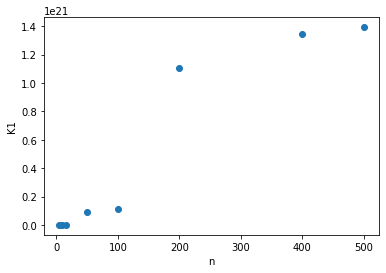

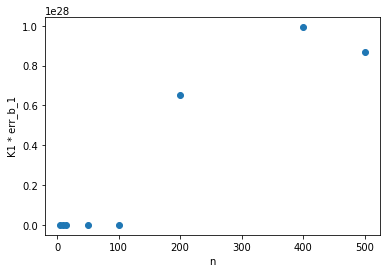

In [15]:
which_matrix = "hilbert"

print(experiment1(which_matrix, 5))
res = pd.DataFrame()
for n in ns:
    res = res.append(experiment1(which_matrix, n), ignore_index=True)

plt.scatter(res['n'], res['err_x_1'])
plt.ylabel('err_x_1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1'])
plt.ylabel('K1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1']*res['err_b_1'])
plt.ylabel('K1 * err_b_1')
plt.xlabel('n')
plt.show()


#### Comment

* when A is hilbert matrix the error can explode with larger $n$
* The condition number is too large, and the $K(A) \frac{||\delta b||}{||b||}$ can also be quite large
* I only show a couple of results but other combinations are similar

### Pascaul Matrix

In [16]:
experiment1(which_matrix, 200)

{'which_matrix': 'hilbert',
 'n': 200,
 'K1': 1.1088754082997574e+21,
 'K2': 4.661943658119866e+16,
 'Kinf': 1.1623054772607414e+21,
 'err_b_1': 5879269.103677481,
 'err_b_2': 275.2800577913815,
 'err_b_inf': 4917525.993173055,
 'err_x_1': 501.81188264553566,
 'err_x_2': 682.6026368641097,
 'err_x_inf': 2187.3100276914815}

{'which_matrix': 'pascal', 'n': 5, 'K1': 15624.0, 'K2': 8517.52436113831, 'Kinf': 15624.0, 'err_b_1': 0.0, 'err_b_2': 0.0, 'err_b_inf': 0.0, 'err_x_1': 0.0, 'err_x_2': 0.0, 'err_x_inf': 0.0}


/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars


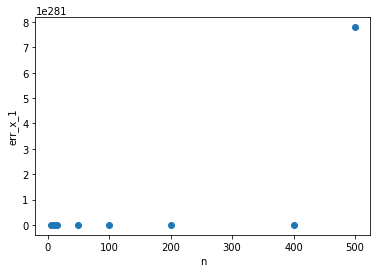

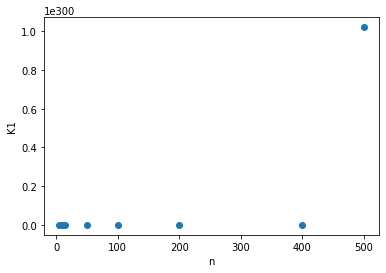

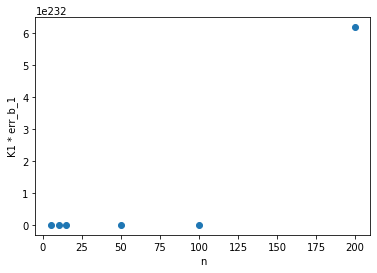

In [17]:
which_matrix = "pascal"

print(experiment1(which_matrix, 5))
res = pd.DataFrame()
for n in ns:
    res = res.append(experiment1(which_matrix, n), ignore_index=True)

plt.scatter(res['n'], res['err_x_1'])
plt.ylabel('err_x_1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1'])
plt.ylabel('K1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1']*res['err_b_1'])
plt.ylabel('K1 * err_b_1')
plt.xlabel('n')
plt.show()



#### Comment:

* I encountered severe numerical issue here. Condition number becomes very very big when $n$ gets large

### Magic Matrix

{'which_matrix': 'pascal', 'n': 5, 'K1': 15624.0, 'K2': 8517.52436113831, 'Kinf': 15624.0, 'err_b_1': 0.0, 'err_b_2': 0.0, 'err_b_inf': 0.0, 'err_x_1': 0.0, 'err_x_2': 0.0, 'err_x_inf': 0.0}


/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/ontheroad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars


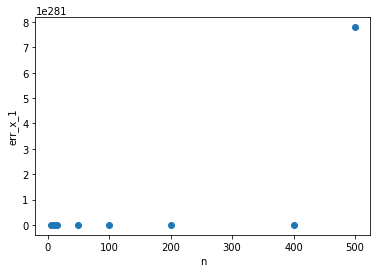

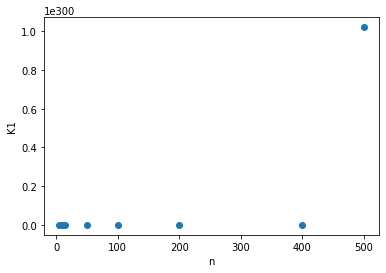

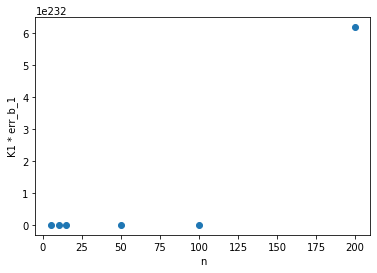

In [18]:
which_matrix = "pascal"

print(experiment1(which_matrix, 5))
res = pd.DataFrame()
for n in ns:
    res = res.append(experiment1(which_matrix, n), ignore_index=True)

plt.scatter(res['n'], res['err_x_1'])
plt.ylabel('err_x_1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1'])
plt.ylabel('K1')
plt.xlabel('n')
plt.show()

plt.scatter(res['n'], res['K1']*res['err_b_1'])
plt.ylabel('K1 * err_b_1')
plt.xlabel('n')
plt.show()

#### Comment:

* I encountered severe numerical issue here. Condition number becomes very very big when $n$ gets large

## (d)

* $K(A)\frac{||\delta b||}{||b||}$ can predict (bound) error for $x$. 
* By comparing different $A$, we can see their condition numbers differ drastically and therefore the solution stability differ a lot. For $A$ with very large condition number, we cannot hope for accurate estimate of $x$ when $n$ gets reasonably large

## (e)
* As preached many times in class, the accuracy will be very bad. As the condition number for the problem inversion is much larger. 
* Below I use Hilbert matrix as an example (note that for gaussian matrix the estimation is still accurate). 

In [19]:
def experiment2(which_matrix ,n):
    if which_matrix == "gaussian":
        np.random.seed(123)
        A = np.random.normal(size = (n, n))
    if which_matrix == "hilbert":
        A = scipy.linalg.hilbert(n)
    if which_matrix == "pascal":
        A = scipy.linalg.pascal(n).astype('float')
    if which_matrix == "magic":
        A = my_magic(n)
        
    A_inv = np.linalg.inv(A)
    x = np.ones((n))
    b = A @ x

    xhat = A_inv @ b 
    dx = x - xhat

    err_x_1 = norm_v(dx, "one") / norm_v(x, "one")
    err_x_2 = norm_v(dx, "two") / norm_v(x, "two")
    err_x_inf = norm_v(dx, "infty") / norm_v(x, "infty")

    return {'which_matrix':which_matrix, 'n':int(n),
            'err_x_1' : err_x_1, 'err_x_2' : err_x_2, 'err_x_inf' : err_x_inf}

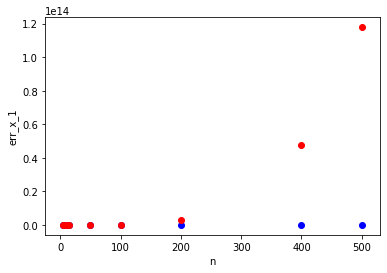

In [20]:
which_matrix = "hilbert"

res = pd.DataFrame()
for n in ns:
    res = res.append(experiment1(which_matrix, n), ignore_index=True)

res2 = pd.DataFrame()
for n in ns:
    res2 = res2.append(experiment2(which_matrix, n), ignore_index=True)

plt.scatter(res['n'], res['err_x_1'], color = "blue")
plt.scatter(res2['n'], res2['err_x_1'], color = "red")
plt.ylabel('err_x_1')
plt.xlabel('n')
plt.show()



## (f)

* Just use the formula $A^{-1}_{ij} = (-1)^{i+j} M_{ij}$ where $M_{ij} = det(A_{-i, -j})/ det(A)$

* I implemented and tested against directly solving $A^{-1}$ below:

In [21]:
def compute_Ainv_11(A):
    det_A = np.linalg.det(A)
    A = np.delete(A, 0, axis=0)
    A = np.delete(A, 0, axis=1)
    
    return np.linalg.det(A) / det_A

In [22]:
n = 10
np.random.seed(123)
A = np.random.normal(size = (n, n))
print(np.linalg.inv(A)[0,0])
print(compute_Ainv_11(A))


1.3083898591563157
1.3083898591563146
